# Preparing your data for the atlas website

To upload data to the website you will need to provice
- A `regions` array containing the brain regions to be displayed. The regions can be given either as Allen `acronyms` or `atlas_ids`
- One (or more) `feature` array(s) containing the values to be displayed, each corresponding to a brain region listed in the `regions` array
- The names of each features


Here we go detail some considerations that must be taken when preparing your data

## 1.  Difference between giving acronyms and altas ids

The regions provided can either be Allen `acronyms` or `atlas ids`. When providing `acronyms` data will only be displayed on a single hemisphere, when providing `atlas ids` data can be displayed on both hemispheres.

### Single hemisphere data
When your data lies in one hemisphere, either an array of Allen `acronyms` or `atlas ids` may be provided. 

If `acronyms` are given, the hemisphere `hemisphere='left'` or `hemisphere='right` must also be given as an argument when uploading your data

When providing `atlas ids` the hemisphere is encoded in the sign of the values. Negative `atlas ids` are interpreted to be on the left hemipshere and positive `atlas ids` on the right hemisphere. Regardless of whether a `hemisphere` argument is given, the sign of the `atlas ids` will be used.

In [1]:
from iblbrainviewer.api import FeatureUploader
from iblatlas.regions import BrainRegions
import numpy as np
bucket = 'ibl_hemisphere_data'
br = BrainRegions()
up = FeatureUploader(bucket)

#### Example: Upload acronyms to left hemisphere

In [2]:
acronyms = np.array(['CA1', 'VPM', 'AVPV', 'VISa1'])
values = np.array([1, 2, 3, 4])
fname = 'acronyms_left_hemisphere'

if not up.features_exist(fname):
    # For acronyms must provide hemisphere argument
    up.create_features(fname, acronyms, values, hemisphere='left')

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_hemisphere_data&bucket=ibl_hemisphere_data


#### Example: Upload acronyms to right hemisphere

In [3]:
acronyms = np.array(['CA1', 'VPM', 'AVPV', 'VISa1'])
values = np.array([1, 2, 3, 4])
fname = 'acronyms_right_hemisphere'

if not up.features_exist(fname):
    # For acronyms must provide hemisphere argument
    up.create_features(fname, acronyms, values, hemisphere='right')

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_hemisphere_data&bucket=ibl_hemisphere_data


#### Example: Upload atlas_ids to left hemipshere

In [4]:
# Negative atlas ids for left hemisphere
atlas_ids = np.array([-382, -733, -272, -312782550])
values = np.array([1, 2, 3, 4])
fname = 'atlas_ids_left_hemisphere'

if not up.features_exist(fname):
    up.create_features(fname, atlas_ids, values)

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_hemisphere_data&bucket=ibl_hemisphere_data


#### Example: Upload atlas_ids to right hemipshere

In [5]:
# Positive atlas ids for left hemisphere
atlas_ids = np.array([382, 733, 272, 312782550])
values = np.array([1, 2, 3, 4])
fname = 'atlas_ids_right_hemisphere'

if not up.features_exist(fname):
    up.create_features(fname, atlas_ids, values)

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_hemisphere_data&bucket=ibl_hemisphere_data


### Dual hemisphere data
When data is to be displayed on both hemispheres, only `atlas ids` can be provided. The information about the hemisphere the data lies on is encoded in the sign of the `atlas ids`.  Negative `atlas ids` are interpreted to be on the left hemipshere and positive `atlas ids` on the right hemisphere.

#### Example: Upload data to both hemispheres

In [6]:
# For dual hemisphere data need to provide atlas ids
# Positive for right hemisphere
right_hem_ids = np.array([382, 733, 272, 312782550])
right_hem_vals = np.array([1, 2, 3, 4])

# Negative for right hemisphere
left_hem_ids = np.array([-382, -733, -272, -312782550])
left_hem_vals = np.array([5, 6, 7, 8])

# Combine
atlas_ids = np.r_[right_hem_ids, left_hem_ids]
values = np.r_[right_hem_vals, left_hem_vals]

fname = 'atlas_ids_both_hemispheres'

if not up.features_exist(fname):
    up.create_features(fname, atlas_ids, values)

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_hemisphere_data&bucket=ibl_hemisphere_data


## 2. Regions that act as both nodes and leafs in the Allen structure tree

There are a number of regions in the Allen structure tree that act as both nodes and leaves in the hierachical Allen structure tree. This means that these regions are both contained in the annotation volume and contain children who are also in the annotiation volume. 

An example is the thalamus `TH`. When plotting `TH` on the coronal slice below we can see that TH corresponds to the shell, or unassigned regions of the thalamus (shown in yellow). It's children, e.g `VPM` are also contained in the annotation volume (shown in blue)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

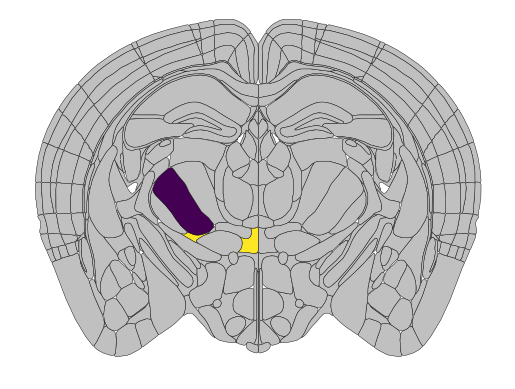

In [7]:
from iblatlas.plots import plot_scalar_on_slice
import numpy as np

acronyms = np.array(['TH', 'VPM'])
values = np.array([20, 10])

plot_scalar_on_slice(acronyms, values, coord=-1800, slice='coronal', background='boundary', 
                     vector=True)

If a value, therefore, for `TH` is passed in as a region, it is important to differentiate whether this value corresponds to the leaf i.e the shell shown in yellow in the figure above, or the node, in which case, this value will be propagated to all it's children. 

By default, if a value of `TH` is passed in, it is assumed to be the node, i.e all children without a distinct value will be assigned this value. 

If you instead would like to pass in `TH` as the leaf (shown in yellow above) you can pass in the argument `map_nodes=True` when uploading your features. 

To get a better feel for the difference let's upload two features, one where we map the nodes and one where we don't.

In [8]:
from iblbrainviewer.api import FeatureUploader
from iblatlas.regions import BrainRegions
import numpy as np
bucket = 'ibl_node_and_leaf_data'
br = BrainRegions()
up = FeatureUploader(bucket)

acronyms = np.array(['TH'])
values = np.array([1])

fname = 'thalamus_non_mapped'
if not up.features_exist(fname):
    up.create_features(fname, acronyms, values, hemisphere='left', map_nodes=False)

fname = 'thalamus_mapped'
if not up.features_exist(fname):
    up.create_features(fname, acronyms, values, hemisphere='left', map_nodes=True)

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_node_and_leaf_data&bucket=ibl_node_and_leaf_data


If we load in the url and look at the features, we can see that when we don't map the nodes, `thalamus_non_mapped`, the data from `TH` is propagated to all it's children, e.g `VPM`, `SPA` etc. If we look at the mapped feature `thalamus_mapped`, only the region in the volume assigned to `TH` is given the value.

There may be cases where you would like to pass in both a value for the leaf and the node. In these cases the array must be constructed in advance and passed into the uploader

In [9]:
from iblbrainviewer.mappings import RegionMapper
import numpy as np

# The values for the nodes
acronyms_node = np.array(['TH', 'ZI', 'VPM'])
values_node = np.array([1, 2, 3])

# The values for the leaves
acronyms_leaf = np.array(['TH', 'ZI'])
values_leaf = np.array([4, 5])

mapper = RegionMapper(acronyms_leaf, values_leaf, hemisphere='left')
mapped_acronyms = mapper.map_nodes_to_leaves()
print(mapped_acronyms)

['TH-lf' 'ZI-lf']


Notice how, `TH` and `ZI` has been reassgined the acronym of `TH-lf` and `ZI-lf`. We can then construct our full array to pass into the feature uploader

In [10]:
acronyms = np.r_[acronyms_node, mapped_acronyms]
values = np.r_[values_node, values_leaf]

fname = 'thalamus_node_and_leaf'
if not up.features_exist(fname):
    up.create_features(fname, acronyms, values, hemisphere='left')

url = up.get_buckets_url([bucket])
print(url)

https://atlas.internationalbrainlab.org/?buckets=ibl_node_and_leaf_data&bucket=ibl_node_and_leaf_data


If we reload the page, we can see this new feature. In this feature, the value of `TH` has been propagated to all it's children that do not have values, e.g `VPM` and `ZI` take their own values, and the regions in the annotation volume assigned to `TH` take their own value. 

A full list of all the regions that are both nodes and leafs is shown below.

In [11]:
import pandas as pd
from iblbrainviewer.mappings import read_region_info
df = read_region_info()
cols = ['acronyms', 'node_and_leaf_acronyms', 'node_and_leaf_ids']
print(df[df['node_and_leaf'] == 1][cols])

          acronyms node_and_leaf_acronyms  node_and_leaf_ids
1             root                root-lf             5024.0
380            OLF                 OLF-lf             5009.0
455            HPF                 HPF-lf             5002.0
556          CTXsp               CTXsp-lf             5001.0
572            STR                 STR-lf             5014.0
609            PAL                 PAL-lf             5012.0
642             TH                  TH-lf             5015.0
716             HY                  HY-lf             5003.0
803             ZI                  ZI-lf             5019.0
807             MB                  MB-lf             5007.0
839            PAG                 PAG-lf             5011.0
871            IPN                 IPN-lf             5006.0
884              P                   P-lf             5010.0
891             PB                  PB-lf             5013.0
936             MY                  MY-lf             5008.0
1015            CB      